In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
import argparse
import os
import pickle

In [2]:
params = give_def_params()
params, exp_path = check_params(params)
[eta, gamma, kappa, omega, n] = params

train_id = 0
periods = 10
ppp = 1000
itraj = 1
rppp_reference = 1
method="rossler"



states, covs, signals, params, times, u_th, covs_th = load_data(ppp=ppp, periods=periods, 
                                                 method=method, itraj=itraj, exp_path=exp_path , rppp = rppp_reference, fisher=True)


In [3]:
Period = 2*np.pi/omega

spectra_signal = np.abs(np.fft.fft(signals[:,0]))**2
freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)


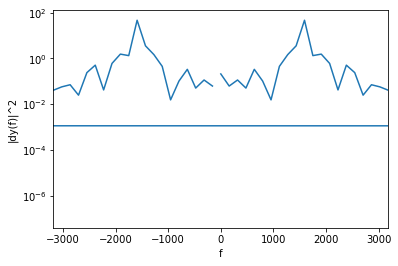

In [4]:
ax = plt.subplot(111)
ax.plot(freqs_signal,spectra_signal)
ax.set_ylabel("|dy(f)|^2")
ax.set_xlabel("f")
fomega = omega/(2*np.pi)
ax.set_xlim([-2*fomega,2*fomega])
ax.set_yscale("log")
#ax.axvline(params[-2]/(2*np.pi),color="black")
#ax.axvline(-params[-2]/(2*np.pi),color="black")

In [25]:
Period = 2*np.pi/omega

spectra_signal = spectra_signal[freqs_signal>=0]
freqs_signal = freqs_signal[freqs_signal>=0]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)


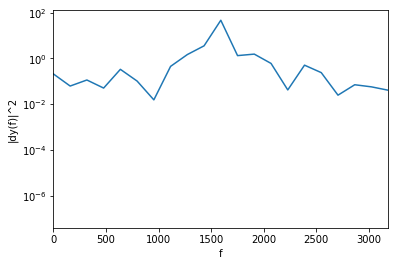

In [26]:
ax = plt.subplot(111)
ax.plot(freqs_signal,spectra_signal)
ax.set_ylabel("|dy(f)|^2")
ax.set_xlabel("f")
fomega = omega/(2*np.pi)
ax.set_xlim([0,2*fomega])
ax.set_yscale("log")
#ax.axvline(params[-2]/(2*np.pi),color="black")
#ax.axvline(-params[-2]/(2*np.pi),color="black")

In [5]:
from lmfit.models import LorentzianModel
mod = LorentzianModel()

In [6]:
pars = mod.guess(spectra_signal, x=freqs_signal)
out = mod.fit(spectra_signal, pars, x=freqs_signal)

In [9]:
out.values["center"]

1.1457615110476826

In [38]:
def fit_lorentzian(signals):
    Period = 2*np.pi/omega
    spectra_signal = np.abs(np.fft.fft(signals[:,0]))**2
    freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

    
    spectra_signal = spectra_signal[freqs_signal>=0]
    freqs_signal = freqs_signal[freqs_signal>=0]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

    fomega = 2*np.pi*omega
    spectra_signal = spectra_signal[freqs_signal < 2*fomega]
    freqs_signal = freqs_signal[freqs_signal< 2*fomega]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)

    
    mod = LorentzianModel()
    
    pars = mod.guess(spectra_signal, x=freqs_signal)
    out = mod.fit(spectra_signal, pars, x=freqs_signal)
    
    return out.values["center"]

In [41]:
fits = []
for itraj in tqdm(range(1,501)):
    
    states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, 
                                                     method=method, itraj=itraj, exp_path=exp_path , rppp = rppp_reference, fisher=False)

    fits.append(fit_lorentzian(signals))


100%|██████████| 500/500 [09:35<00:00,  1.15s/it]


In [42]:
np.std(fits)

32.61525006032019

In [20]:
states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, 
                                                     method=method, itraj=1, exp_path=exp_path , rppp = rppp_reference, fisher=False)

Period = 2*np.pi/omega
spectra_signal = np.abs(np.fft.fft(signals[:,0]))**2
freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)


spectra_signal = spectra_signal[freqs_signal>=0]
freqs_signal = freqs_signal[freqs_signal>=0]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)



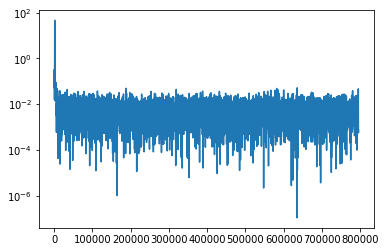

In [23]:
ax = plt.subplot(111)
ax.plot(freqs_signal,spectra_signal)
ax.set_yscale("log")

In [36]:
fomega = 2*np.pi*omega
spectra_signal = spectra_signal[freqs_signal < 2*fomega]
freqs_signal = freqs_signal[freqs_signal< 2*fomega]#np.fft.fftfreq(n = len(spectra_signal), d= Period/ppp)



mod = LorentzianModel()

pars = mod.guess(spectra_signal, x=freqs_signal)
out = mod.fit(spectra_signal, pars, x=freqs_signal)

In [37]:
out.values["center"]

1562.61526121661

In [33]:
fomega

62831.853071795864

In [13]:
out.values["center"]

-5036.529838381437

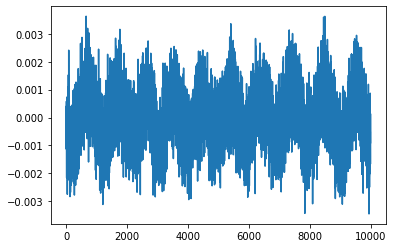

In [17]:
plt.plot(signals[:,0])